In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt

# SIR Model on G(n,p) Network

Code adapted from first example found here: https://arxiv.org/pdf/2001.02436.pdf.

### Resources
* [Her colleague's paper](https://d1b10bmlvqabco.cloudfront.net/attach/k7v24tpzbybzr/jmca5mxi9t361a/k9ye8o2opt8i/jail_paper.pdf)
* [Daily Bruin Article](https://stack.dailybruin.com/2020/05/12/covid-model/)
* [Epidemics on Networks paper](https://arxiv.org/pdf/2001.02436.pdf)

### Coding Documentation

* https://networkx.github.io/documentation/stable/reference/index.html
* https://epidemicsonnetworks.readthedocs.io/en/latest/

### TODO:
**Emma & Sam**
* Get more appropriate graph for a prison
* Set parameters to be COVID specific --- Check paper she posted

**Me & Marcel**
* Figure out how to incorporate birth rate into prison
* Figure out how to incorporate inmate releases
* Use SIR model

## Set Parameters

In [13]:
# Set G(n,p) model-specific parameters
N = 1000 # number of individuals
kave = 5 # expected number of contacts per person

# Set simulation-specific parameters
rho = 0.005 # initial fraction infected
tau = 0.7 # transmission rate
gamma = 1.0 # recovery rate

## Generate graph

In [14]:
G = nx.fast_gnp_random_graph(N, kave/(N-1))

## Run Initial Simulation

fast_SIR uses and events-based simulation and assumes Markovian properties(?). I.e. it assumes:
* constant transmission and recovery rates

In [19]:
data = EoN.fast_SIR(G, tau, gamma, rho=rho, return_full_data=True)

Wall time: 8.15 s


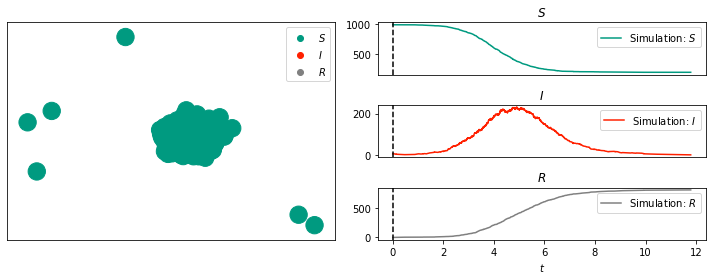

In [24]:
%time data.animate()

In [16]:
deaths = (R1 * 0.1)
t_deaths = t1 + 7

## Simulate Inmate Release

In [17]:
G

## Run Simulation After Release

## Plot Results

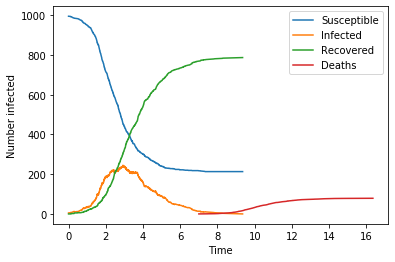

In [18]:
plt.plot(t1, S1, label = 'Susceptible')
plt.plot(t1, I1, label = 'Infected')
plt.plot(t1, R1, label = 'Recovered')
plt.plot(t_deaths, deaths, label = 'Deaths')

plt.xlabel('Time')
plt.ylabel('Number infected')
plt.legend()
plt.show()